# Konjuguotų gradientų metodas (iteracinis gradiento metodas)

Sprendžiame tiesinių lygčių sistemą $\: Ax=b \: $:
$$ \begin{cases} a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n \\ a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n \\ ... \\ a_{n1}x_1 + a_{n2}x_2 + ... + a_{nn}x_n \end{cases} $$,
kurioje $det(A)\neq 0$.

Randame pirmąjį liekamąjį narį:
$$ r_0 = b - Ax_0 $$
Jei $r_0$ yra pakankamai mažas (mažesnis už pakankamai mažą dydį $\varepsilon$), tuomet skaičiavimai baigiami ir gražinamas rezultatas $x_0$.

Kadangi pirmojoje iteracijoje neturime krypties vektoriaus, pirmasis krypties vektorius $p_0$ bus lygus: $p_0 = r_0$. 

Pradedame $k$ iteracijų.
Randame kintamąjį:
$$ \alpha_k := \frac{r_k^Tr_k}{p_k^TAp_k} $$

Tuomet:
$$ x_{k+1} := x_k + \alpha_kp_k, $$
$$ r_{k+1} := r_k - \alpha_kAp_k $$

Jei $r_{k+1}$ yra pakankamai mažas, baigiame $k$ iteracijų. Toliau randame:
$$ \beta_k := \frac{r_{k+1}^Tr_{k+1}}{r_k^Tr_k} $$
$$ p_{k+1} := r_{k+1} + \beta_kp_k $$

Baigiame $k$ iteraciją, ir jei sprendinio konvergavimo sąlyga nesuveikė, atliekame k+1 iteraciją ir t.t.

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
_a = np.array([[4,1], [1,3]])
_b = np.array([1,2])
_x = np.array([2,1])

a = np.array([[2,1,0.5], [3,4,0], [1,2,8]])
b = np.array([1,2,1])
x = np.array([0.5, 0.5, 0.125])

epsilon = 0.001
x_real = np.dot(np.linalg.inv(a),b)

def cg(A, B, xk, Epsilon):
    k=0
    rk = B - np.dot(A,xk)
    X_vec = np.copy(xk)
    if np.all(abs(x_real - xk)<=Epsilon): 
        return X_vec,k+1
    pk = rk
    while(k!=100):
        alpha_k = np.dot(rk,rk)/np.dot(pk,np.dot(A,pk))
        x_k1 = xk + (alpha_k*pk)
        X_vec = np.vstack((X_vec, x_k1))
        r_k1 = rk - (alpha_k*np.dot(A,pk))
        if np.all(abs(x_real - x_k1)<=Epsilon): 
            return X_vec,k+1
        beta_k = np.dot(r_k1,r_k1)/np.dot(rk,rk)
        p_k1 = r_k1 + (beta_k*pk)
        k += 1
        rk = r_k1
        pk = p_k1
        xk = x_k1
    return X_vec,k

In [163]:
x_vec, N = cg(a,b,x,epsilon)
print(f'Sprendiniai: {x_vec[-1]}')
#vec_print = [ print(f"{i}-asis sprendinys: {x_vec[i]}") for i in range(len(x_vec))]
print(f"Paklaidos: {abs(x_real - x_vec[-1])}")

Sprendiniai: [0.39064703 0.20275686 0.03149455]
Paklaidos: [0.00040313 0.00456022 0.0071043 ]


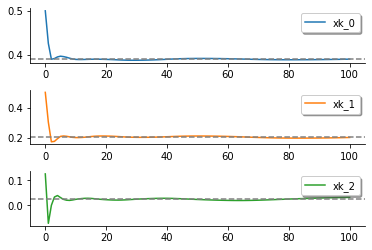

In [164]:
# Funkcijos grafikų braižymui
colors = plt.rcParams["axes.prop_cycle"]()
fig, axs = plt.subplots(a.shape[0], 1)
for i in range(a.shape[0]):
    c = next(colors)["color"]
    axs[i].plot(np.arange(N+1), x_vec[:, i], color=c, label=f"xk_{i}")
    axs[i].axhline(x_real[i], color='gray', linestyle='dashed')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].legend(shadow=True, fancybox=True)
    
plt.subplots_adjust(hspace=0.5)
plt.show()